In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import os

dataframes = []

# Full path to your folder
base_dir = r"C:\Users\mmadh\Downloads\hospitality_data"

for year in [2022, 2023, 2024, 2025]:
    year_path = os.path.join(base_dir, str(year))

    df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
    df_2 = pd.read_csv(os.path.join(year_path, "Hospital_General_Information.csv"), encoding='latin1', dtype={'Facility ID': str})
    df_3 = pd.read_csv(os.path.join(year_path, "OQR_OAS_CAHPS_BY_HOSPITAL.csv"), encoding='latin1', dtype={'Facility ID': str})
    df_4 = pd.read_csv(os.path.join(year_path, "PCH_HCAHPS_HOSPITAL.csv"), encoding='latin1', dtype={'Facility ID': str})

    # Merge dataframes with suffixes
    main_df = pd.merge(df_1, df_2, how='inner', on='Facility ID', suffixes=('', '_df2'))
    main_df = pd.merge(main_df, df_3, how='left', on='Facility ID', suffixes=('', '_df3'))
    main_df = pd.merge(main_df, df_4, how='left', on='Facility ID', suffixes=('', '_df4'))

    main_df['Year'] = year
    dataframes.append(main_df)


C:\Users\mmadh\AppData\Local\Temp\ipykernel_27276\2542697843.py:12: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
C:\Users\mmadh\AppData\Local\Temp\ipykernel_27276\2542697843.py:12: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
C:\Users\mmadh\AppData\Local\Temp\ipykernel_27276\2542697843.py:12: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(os.path.join(year_path, "HCAHPS-Hospital.csv"), encoding='latin1', dtype={'Facility ID': str})
C:\Users\mmadh\AppData\Local\Temp\ipykernel_27276\2542697843.py:12: DtypeWarning: Columns (12,14,17,19) have mixed types. Speci

In [4]:
yr2022_df = dataframes[0]
yr2023_df = dataframes[1]
yr2024_df = dataframes[2]
yr2025_df = dataframes[3]

In [5]:
yr2022_df

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,HCAHPS Answer Percent_df4,HCAHPS Answer Percent Footnote_df4,HCAHPS Linear Mean Value_df4,Number of Completed Surveys_df4,Number of Completed Surveys Footnote_df4,Survey Response Rate Percent_df4,Survey Response Rate Percent Footnote_df4,Start Date_df4,End Date_df4,Year
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437839,670314,ST MICHAELS MEDICAL HOSPITAL LLC,"16000 SOUTHWEST FREEWAY, SUITE 100",SUGAR LAND,TX,77479,FORT BEND,(281) 980-4357,H_RECMND_DY,"Patients who reported YES, they would definite...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
437840,670314,ST MICHAELS MEDICAL HOSPITAL LLC,"16000 SOUTHWEST FREEWAY, SUITE 100",SUGAR LAND,TX,77479,FORT BEND,(281) 980-4357,H_RECMND_PY,"Patients who reported YES, they would probably...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
437841,670314,ST MICHAELS MEDICAL HOSPITAL LLC,"16000 SOUTHWEST FREEWAY, SUITE 100",SUGAR LAND,TX,77479,FORT BEND,(281) 980-4357,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
437842,670314,ST MICHAELS MEDICAL HOSPITAL LLC,"16000 SOUTHWEST FREEWAY, SUITE 100",SUGAR LAND,TX,77479,FORT BEND,(281) 980-4357,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [6]:
# Remove duplicate columns
def remove_duplicate_columns(df):
    return df[[col for col in df.columns if not col.endswith(('_df2', '_df3', '_df4'))]]

yr2022_df = remove_duplicate_columns(yr2022_df)
yr2023_df = remove_duplicate_columns(yr2023_df)
yr2024_df = remove_duplicate_columns(yr2024_df)
yr2025_df = remove_duplicate_columns(yr2025_df)

| Column Name | Description |
|-------------|-------------|
| Facility ID | Unique identifier for the healthcare facility. |
| Facility Name | Official name of the healthcare facility. |
| Address | Street address of the facility. |
| City | City where the facility is located. |
| State | U.S. state where the facility is located. |
| ZIP Code | ZIP code of the facility. |
| County Name | Name of the county the facility is located in. |
| Phone Number | Facility’s contact phone number. |
| HCAHPS Measure ID | ID of the specific HCAHPS (patient experience) survey measure. |
| HCAHPS Question | Survey question asked to patients. |
| HCAHPS Answer Description | Description of the answer option provided. |
| Patient Survey Star Rating | Star rating (1–5) based on patient responses. |
| Patient Survey Star Rating Footnote | Additional explanation or clarification on the star rating. |
| HCAHPS Answer Percent | Percent of patients selecting a particular survey response. |
| HCAHPS Answer Percent Footnote | Notes on how the percentage was calculated or qualified. |
| HCAHPS Linear Mean Value | Average score from survey responses on a linear scale. |
| Number of Completed Surveys | Count of completed patient experience surveys. |
| Number of Completed Surveys Footnote | Additional notes or caveats on the survey count. |
| Survey Response Rate Percent | Percentage of patients who responded to the survey. |
| Survey Response Rate Percent Footnote | Notes on the response rate calculation. |
| Start Date | Start of the data collection period. |
| End Date | End of the data collection period. |
| Hospital Type | Type of hospital (e.g., acute care, critical access). |
| Hospital Ownership | Entity that owns the hospital (e.g., government, private). |
| Emergency Services | Indicates if the facility offers emergency services. |
| Meets criteria for promoting interoperability of EHRs | Whether facility meets federal EHR use standards. |
| Hospital overall rating | Overall CMS quality rating (1–5 stars). |
| Hospital overall rating footnote | Additional information or context for the rating. |
| MORT Group Measure Count | Number of mortality-related quality measures. |
| Count of Facility MORT Measures | Facility-specific mortality measures reported. |
| Count of MORT Measures Better | Measures where the facility performed better than national average. |
| Count of MORT Measures No Different | Measures where performance was similar to the national average. |
| Count of MORT Measures Worse | Measures where the facility performed worse than average. |
| MORT Group Footnote | Notes on mortality measure reporting. |
| Safety Group Measure Count | Number of safety-related quality measures. |
| Count of Facility Safety Measures | Count of safety metrics reported by the facility. |
| Count of Safety Measures Better | Measures where safety outcomes were better than average. |
| Count of Safety Measures No Different | Safety measures where performance was typical. |
| Count of Safety Measures Worse | Measures where safety performance was worse than average. |
| Safety Group Footnote | Notes on safety measure data. |
| READM Group Measure Count | Number of readmission-related measures. |
| Count of Facility READM Measures | Facility-specific readmission measures. |
| Count of READM Measures Better | Measures with better-than-average readmission rates. |
| Count of READM Measures No Different | Readmission performance comparable to average. |
| Count of READM Measures Worse | Measures with worse-than-average readmission rates. |
| READM Group Footnote | Notes about readmission data. |
| Pt Exp Group Measure Count | Number of patient experience-related measures. |
| Count of Facility Pt Exp Measures | Facility-specific patient experience measures. |
| Pt Exp Group Footnote | Additional details on patient experience group. |
| TE Group Measure Count | Count of timely and effective care measures. |
| Count of Facility TE Measures | Number of such measures reported by the facility. |
| TE Group Footnote | Notes about the timely and effective care group. |
| County | County of the facility (may duplicate “County Name”). |
| Telephone | Alternate field for the facility’s phone number. |
| Patients who reported that staff definitely gave care... | % of patients reporting staff were professional and facility was clean. |
| Patients who reported that staff somewhat gave care... | % reporting moderately professional care or cleanliness. |
| Patients who reported that staff did not give care... | % reporting unprofessional care or poor cleanliness. |
| Facilities and staff linear mean score | Average score reflecting staff professionalism and cleanliness. |
| Patients who reported that staff definitely communicated... | % reporting clear communication before/after procedure. |
| Patients who reported that staff somewhat communicated... | % reporting partial or moderate communication. |
| Patients who reported that staff did not communicate... | % reporting no or poor communication. |
| Communication about your procedure linear mean score | Mean score of patient-reported communication. |
| Patients who gave the facility a rating of 9 or 10... | % giving high overall facility ratings. |
| Patients who gave the facility a rating of 7 or 8... | % giving moderate ratings. |
| Patients who gave the facility a rating of 0 to 6... | % giving poor overall ratings. |
| Patients’ rating of the facility linear mean score | Average facility rating across all patients. |
| Patients who reported YES they would DEFINITELY recommend... | % of patients who would definitely recommend the facility. |
| Patients who reported PROBABLY YES they would recommend... | % who would probably recommend. |
| Patients who reported NO, they would not recommend... | % who would not recommend the facility. |
| Patients recommending the facility linear mean score | Average score of patient recommendations. |
| Footnote | General notes or clarifications related to data. |
| Number of Sampled Patients | Total number of patients selected to complete the survey. |


In [7]:
yr2022_df.columns.to_list()

['Facility ID',
 'Facility Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number',
 'HCAHPS Measure ID',
 'HCAHPS Question',
 'HCAHPS Answer Description',
 'Patient Survey Star Rating',
 'Patient Survey Star Rating Footnote',
 'HCAHPS Answer Percent',
 'HCAHPS Answer Percent Footnote',
 'HCAHPS Linear Mean Value',
 'Number of Completed Surveys',
 'Number of Completed Surveys Footnote',
 'Survey Response Rate Percent',
 'Survey Response Rate Percent Footnote',
 'Start Date',
 'End Date',
 'Hospital Type',
 'Hospital Ownership',
 'Emergency Services',
 'Meets criteria for promoting interoperability of EHRs',
 'Hospital overall rating',
 'Hospital overall rating footnote',
 'MORT Group Measure Count',
 'Count of Facility MORT Measures',
 'Count of MORT Measures Better',
 'Count of MORT Measures No Different',
 'Count of MORT Measures Worse',
 'MORT Group Footnote',
 'Safety Group Measure Count',
 'Count of Facility Safety Measures',
 'Count of Safety Measures B

In [8]:
# List of relevant satisfaction-related columns (use exact column names as in your DataFrame)
satisfaction_columns = [
    'Patient Survey Star Rating',
    'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
    'Patients who reported YES they would DEFINITELY recommend the facility to family or friends',
    'Patients recommending the facility linear mean score'
]

# Replace 'Not applicable' with np.nan for all four dataframes
for df in [yr2022_df, yr2023_df, yr2024_df, yr2025_df]:
    df[satisfaction_columns] = df[satisfaction_columns].replace(['Not Applicable', 'Not Available'], np.nan).astype(np.float64)

C:\Users\mmadh\AppData\Local\Temp\ipykernel_27276\3367849222.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[satisfaction_columns] = df[satisfaction_columns].replace(['Not Applicable', 'Not Available'], np.nan).astype(np.float64)
C:\Users\mmadh\AppData\Local\Temp\ipykernel_27276\3367849222.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[satisfaction_columns] = df[satisfaction_columns].replace(['Not Applicable', 'Not Available'], np.nan).astype(np.float64)
C:\Users\mmadh\AppData\Local\Temp\ip

In [9]:
yr2022_df['Patient Survey Star Rating'].unique()

array([nan,  3.,  2.,  4.,  1.,  5.])

In [10]:
yr2022_df['HCAHPS Linear Mean Value'].unique()

array(['Not Applicable', '90', '91', '80', '77', '88', '82', '85', '86',
       '92', '75', '81', '84', '87', '89', '73', '70', '94', '83',
       'Not Available', '78', '71', '74', '79', '76', '93', '95', '96',
       '69', '72', '65', '68', '67', '97', '63', '66', '98', '62', '60',
       '64', '58', '50', '61', '59', '44', '53', '57', '55', '43', '56',
       '99', '100'], dtype=object)

C:\Users\mmadh\AppData\Local\Temp\ipykernel_27276\1283792345.py:24: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
c:\Users\mmadh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


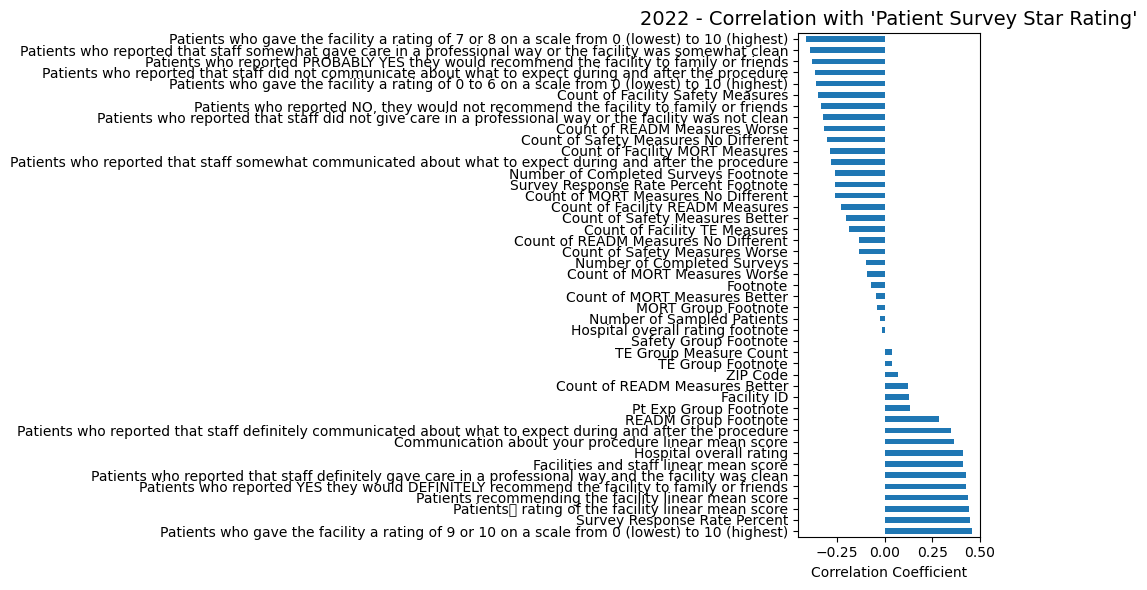

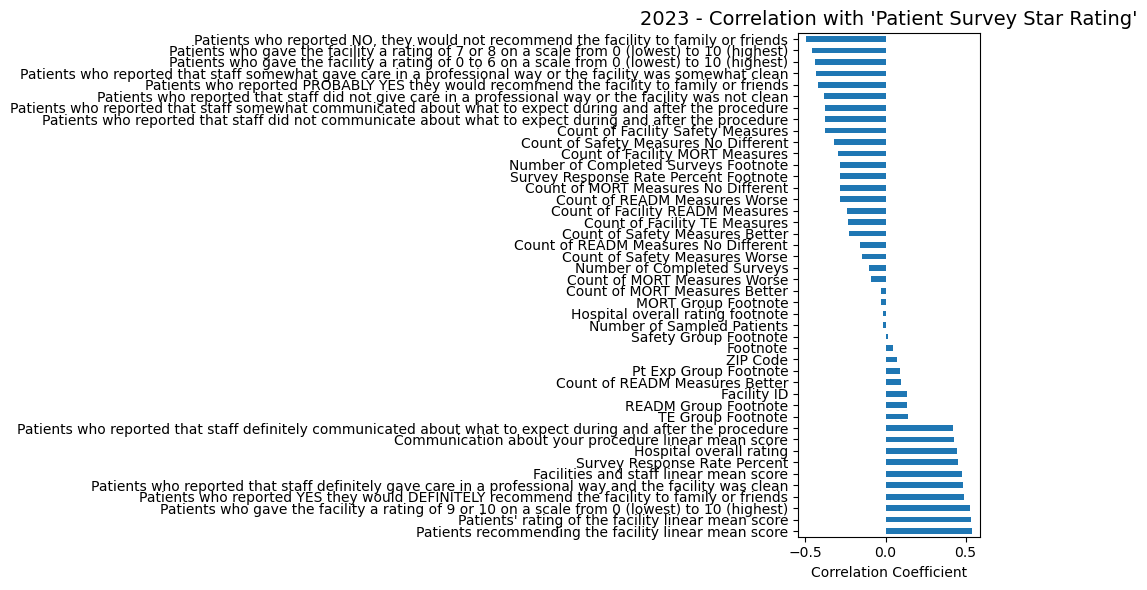

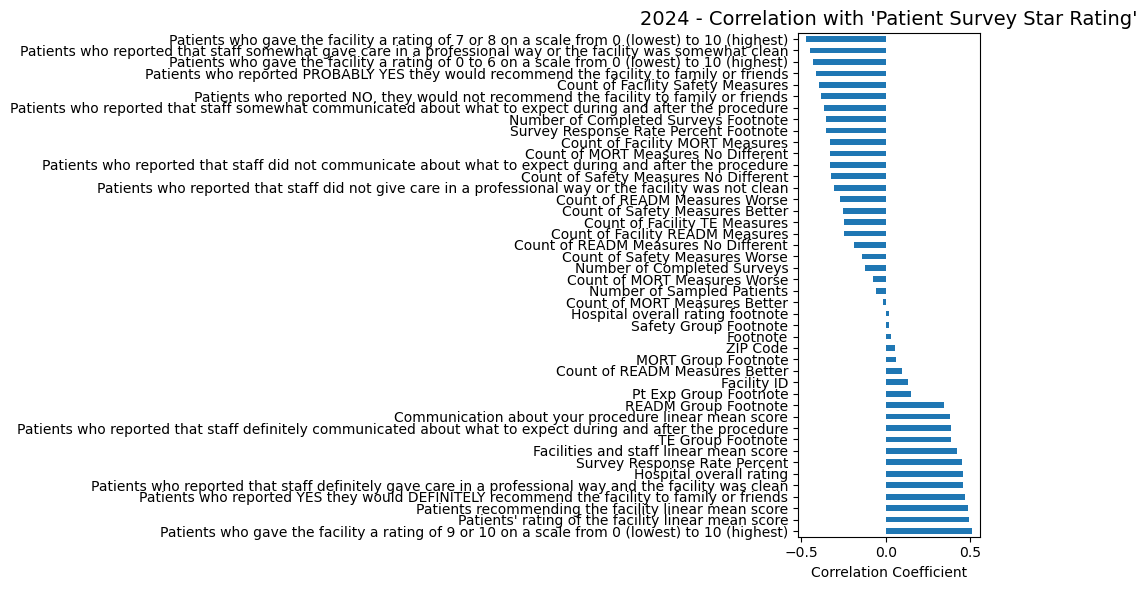

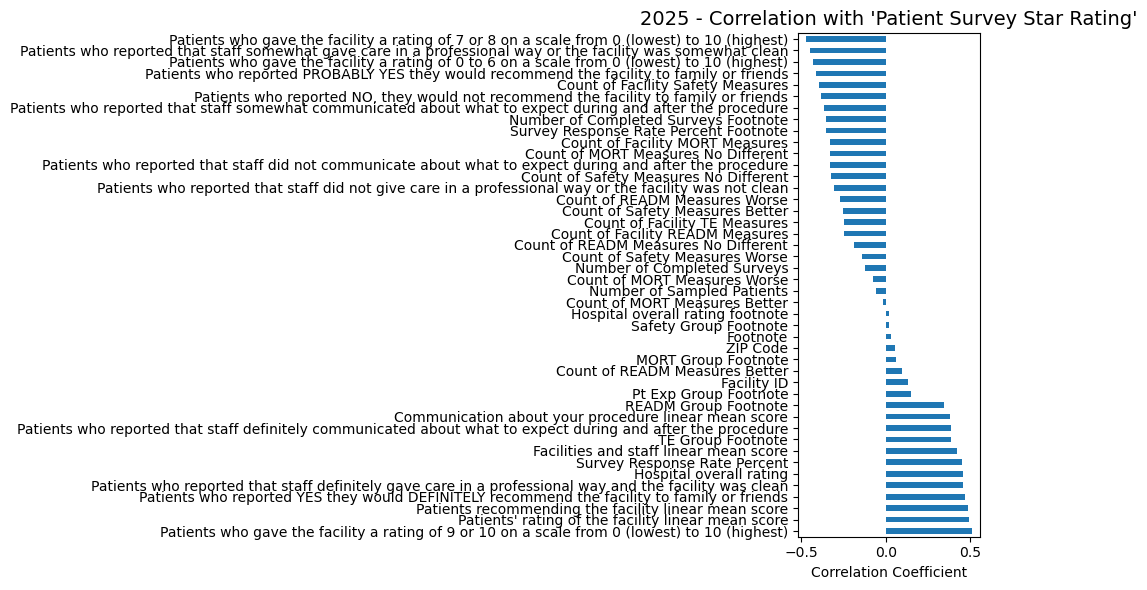

In [11]:
yearly_dfs = {2022: yr2022_df, 2023: yr2023_df, 2024: yr2024_df, 2025: yr2025_df}

# Define the target columns related to patient satisfaction
target_columns = [
    'Patient Survey Star Rating',
]

# Function to compute correlation with target columns for a given year
def compute_target_correlations(df, year):
    df_cleaned = df.replace('Not applicable', np.nan)
    df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')
    correlations = {}
    
    for target in target_columns:
        if target in df_numeric.columns:
            target_corr = df_numeric.corrwith(df_numeric[target]).dropna().sort_values(ascending=False)
            correlations[target] = target_corr.drop(labels=[target], errors='ignore')  # Exclude self-correlation
            
            # Plot correlations for this target
            plt.figure(figsize=(10, 6))
            target_corr.drop(labels=[target], errors='ignore').plot(kind='barh')
            plt.title(f"{year} - Correlation with '{target}'", fontsize=14)
            plt.xlabel("Correlation Coefficient")
            plt.tight_layout()
            plt.show()
    
    return correlations

# Placeholder for correlation results per year
correlation_results = {}

# Compute correlations for each year (assuming dataframes are defined)
for year, df in yearly_dfs.items():
    correlation_results[year] = compute_target_correlations(df, year)


In [12]:
yr2022_df['Patient Survey Star Rating'].unique()

array([nan,  3.,  2.,  4.,  1.,  5.])

In [13]:
yr2022_df['HCAHPS Linear Mean Value'].unique()

array(['Not Applicable', '90', '91', '80', '77', '88', '82', '85', '86',
       '92', '75', '81', '84', '87', '89', '73', '70', '94', '83',
       'Not Available', '78', '71', '74', '79', '76', '93', '95', '96',
       '69', '72', '65', '68', '67', '97', '63', '66', '98', '62', '60',
       '64', '58', '50', '61', '59', '44', '53', '57', '55', '43', '56',
       '99', '100'], dtype=object)

In [14]:
features = ['Hospital overall rating', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for promoting interoperability of EHRs']

In [15]:
for df in [yr2022_df, yr2023_df, yr2024_df, yr2025_df]:
    print(df['Patient Survey Star Rating'].describe())
    print(df['Patient Survey Star Rating'].isna().sum())

count    34980.000000
mean         3.191424
std          0.983529
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
402864
count    36003.000000
mean         3.299142
std          1.009486
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
413094
count    35277.000000
mean         3.212745
std          1.065232
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
409170
count    35277.000000
mean         3.212745
std          1.065232
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Patient Survey Star Rating, dtype: float64
409170
